<a href="https://colab.research.google.com/github/ahmadSoliman94/Machine-Learning/blob/main/DL/Projects/Computer%20Vision/C_V_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Welcome to Computer Vision</center>


## Loading, Displaying and Saving
### Import the necessary packages

In [ ]:
from __future__ import print_function
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

## Load the image and show some basic information on it

In [ ]:
image = cv2.imread("images/image1.jpg")
print("width: {} pixels".format(image.shape[1]))
print("height: {} pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))

width: 942 pixels
height: 848 pixels
channels: 3


## Show the image and wait for a keypress

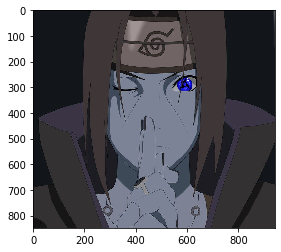

In [ ]:
plt.imshow(image)

## Save the image

Note: OpenCV handles converting filetypes automatically

In [ ]:
cv2.imwrite("images/new_image1.jpg", image)

True

### Images are just NumPy arrays. The top-left pixel can be found at (0, 0)

In [ ]:
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel at (0, 0) - Red: 25, Green: 21, Blue: 18


### Now, let's change the value of the pixel at (0, 0) and make it red

In [ ]:
image[0, 0] = (0, 0, 255)
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel at (0, 0) - Red: 255, Green: 0, Blue: 0


### Since we are using NumPy arrays, we can apply slicing and grab large chunks of the image. Let's grab Itachi's Eye

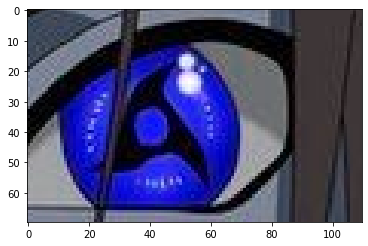

In [ ]:
corner = image[250:320, 550:660]
plt.imshow(corner)

### Let's make the top-left corner of the image green

In [ ]:
image[0:100, 0:100] = (0, 255, 0)

### Show our updated image

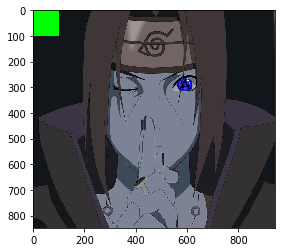

In [ ]:
plt.imshow(image)

![challengeribbonflat.png](attachment:challengeribbonflat.png)

# Challenge 1  :-  Make the left half of 3 uploaded images  Be Red  with best Optimized Code 

In [ ]:
# Your Code 
None 

# Drawing

### Initialize our canvas as a 300x300 with 3 channels - Red, Green, and Blue, with a black background

In [ ]:
canvas = np.zeros((300, 300, 3), dtype = "uint8")

### Draw a green line from the top-left corner of our canvas to the bottom-right

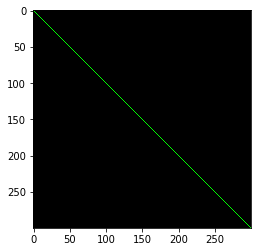

In [ ]:
green = (0, 255, 0)
cv2.line(canvas, (0, 0), (300, 300), green)
plt.imshow(canvas)

### Now, draw a 3 pixel thick red line from the top-right corner to the bottom-left

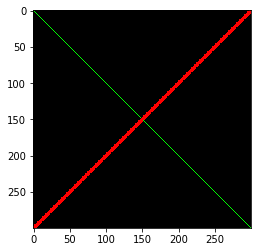

In [ ]:
red = (255, 0, 0)
cv2.line(canvas, (300, 0), (0, 300), red, 3)
plt.imshow(canvas)

### Draw a green 50x50 pixel square, starting at 10x10 and ending at 60x60, 2 pixels thick

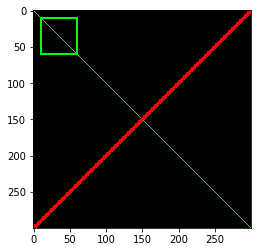

In [ ]:
cv2.rectangle(canvas, (10, 10), (60, 60), green, 2)
plt.imshow(canvas)

### Draw another rectangle, this time we'll make it red and 5 pixels thick

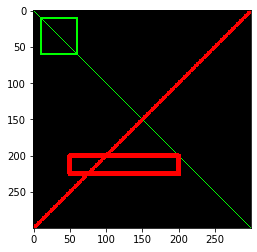

In [ ]:
cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)
plt.imshow(canvas)

### Let's draw one last rectangle: blue and filled in

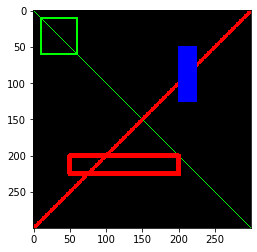

In [ ]:
blue = (0, 0, 255)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)
plt.imshow(canvas)

### Reset our canvas and draw a white circle at the center of the canvas with increasing radii - from 25 pixels to 150 pixels

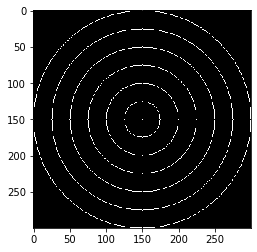

In [ ]:
canvas = np.zeros((300, 300, 3), dtype = "uint8")
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
white = (255, 255, 255)

for r in range(0, 175, 25):
    cv2.circle(canvas, (centerX, centerY), r, white)

plt.imshow(canvas)

### Let's go crazy and draw 25 random circles

- Randomly generate a radius size between 5 and 200
- Generate a random color 
- And then pick a random point on our canvas where the circle will be drawn
- Draw the random circle

In [ ]:
for i in range(0, 25):
    radius = np.random.randint(5, high = 200)
    color = np.random.randint(0, high = 256, size = (3,)).tolist()
    pt = np.random.randint(0, high = 300, size = (2,))

    cv2.circle(canvas, tuple(pt), radius, color, -1)

### Show our masterpiece

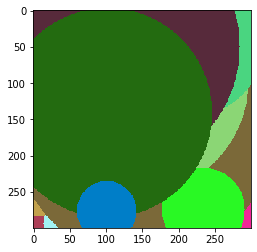

In [ ]:
plt.imshow(canvas)

# Image Transformations 
### - Translation, Rotation, Resizing, Flipping and Cropping

### Import the necessary packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import imutils

# 1. Translation

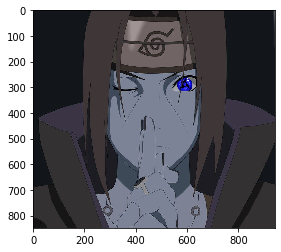

In [ ]:
# Load the image and show it
image = cv2.imread("images/image1.jpg")
plt.imshow(image)

NOTE: 

Translating (shifting) an image is given by a NumPy matrix in the form: [[1, 0, shiftX], [0, 1, shiftY]]

You simply need to specify how many pixels you want to shift the image in the X and Y direction.
### Let's translate the image 100 pixels to the right and 100 pixels down

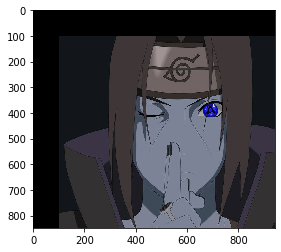

In [ ]:
M = np.float32([[1, 0, 100], [0, 1, 100]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt.imshow(shifted)

### Now, let's shift the image 200 pixels to the left and 100 pixels up. We accomplish this using negative values

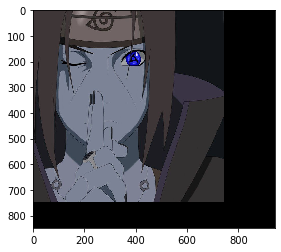

In [ ]:
M = np.float32([[1, 0, -200], [0, 1, -100]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt.imshow(shifted)

### Finally, let's use our helper function in imutils.py to shift the image down 300 pixels

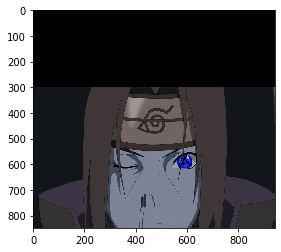

In [ ]:
shifted = imutils.translate(image, 0, 300)
plt.imshow(shifted)

# 2. Rotation

### Grab the dimensions of the image and calculate the center of the image

In [ ]:
(h, w) = image.shape[:2]
center = (w // 2, h // 2)

### Rotate our image by 45 degrees

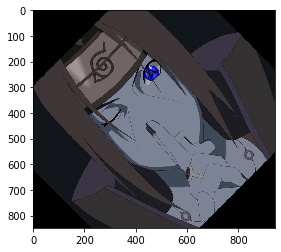

In [ ]:
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt.imshow(rotated)

### Rotate our image by -90 degrees

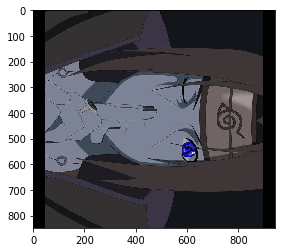

In [ ]:
M = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt.imshow(rotated)

### Finally, let's use our helper function in imutils.py to rotate the image by 180 degrees (flipping it upside down)

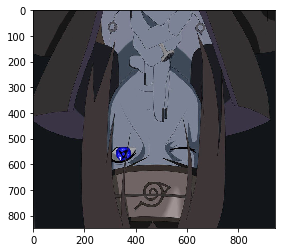

In [ ]:
rotated = imutils.rotate(image, 180)
plt.imshow(rotated)

# 3. Resizing

We need to keep in mind aspect ratio so the image does not look skewed or distorted 

-- therefore, we calculate the ratio of the new image to the old image. 
### Let's make our new image have a width of 150 pixels

In [ ]:
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))

### Perform the actual resizing of the image

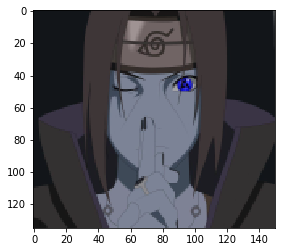

In [ ]:
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized)

What if we wanted to adjust the height of the image? 

We apply the same concept, again keeping in mind the aspect ratio, but instead calculating the ratio based on height.
### Let's make the height of the resized image 50 pixels

In [ ]:
r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

### Perform the resizing

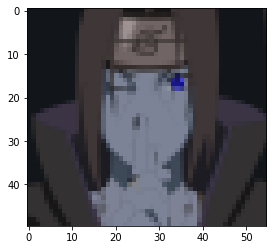

In [ ]:
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized)

Of course, calculating the ratio each and every time we want to resize an image is a real pain. 
### Let's create a function where we can specify our target width or height, and have it take care of the rest for us.

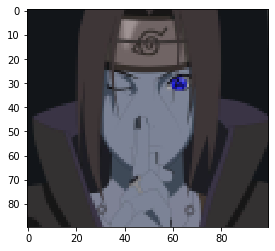

In [ ]:
resized = imutils.resize(image, width = 100)
plt.imshow(resized)

# 4. Flipping

### Flip the image horizontally

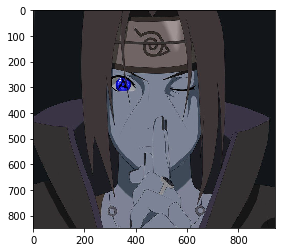

In [ ]:
flipped = cv2.flip(image, 1)
plt.imshow(flipped)

### Flip the image vertically

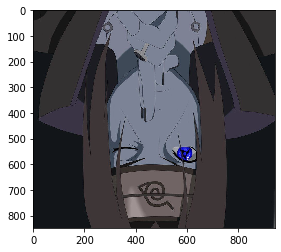

In [ ]:
flipped = cv2.flip(image, 0)
plt.imshow(flipped)

### Flip the image along both axes

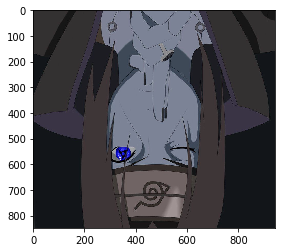

In [ ]:
flipped = cv2.flip(image, -1)
plt.imshow(flipped)

# 5. Cropping

Cropping an image is as simple as using array slices in NumPy! 

The order in which we specify the coordinates is: startY:endY, startX:endX

### Let's crop out the Mangekyou Sharingan. 
In this case, we are starting at Y=30 and ending at Y=120. Similarly, we start at X=240 and X=335.

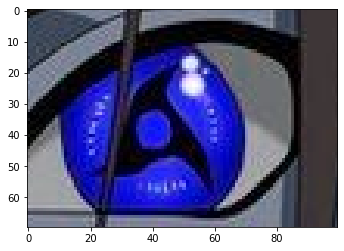

In [ ]:
cropped = image[250:320 , 550:650]
plt.imshow(cropped)

# Image Arithematic

### Import the necessary packages

In [ ]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

### Load the image and show it

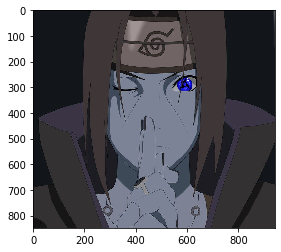

In [ ]:
image = cv2.imread("images/image1.jpg")
plt.imshow(image)

Images are NumPy arrays, stored as unsigned 8 bit integers. 

What does this mean? It means that the values of our pixels will be in the range [0, 255]. 

When using functions like cv2.add and cv2.subtract, values will be clipped to this range, even if the added or subtracted values fall outside the range of [0, 255]. 

Check out an example:

In [ ]:
print("max of 255: {}".format(cv2.add(np.uint8([200]), np.uint8([100]))))
print("min of 0: {}".format(cv2.subtract(np.uint8([50]), np.uint8([100]))))

max of 255: [[255]]
min of 0: [[0]]


NOTE: If you use NumPy arithmetic operations on these arrays, the values will be modulos (wrap around) instead of being clipped to the [0, 255] arrange. 

This is important to keep in mind when working with images.

In [ ]:
print("wrap around: {}".format(np.uint8([200]) + np.uint8([100])))
print("wrap around: {}".format(np.uint8([50]) - np.uint8([100])))

wrap around: [44]
wrap around: [206]


### Let's increase the intensity of all pixels in our image by 100. 

We accomplish this by constructing a NumPy array that is the same size of our matrix (filled with ones)

and the multiplying it by 100 to create an array filled with 100's. 

Then we simply add the images together. Notice how the image is "brighter".

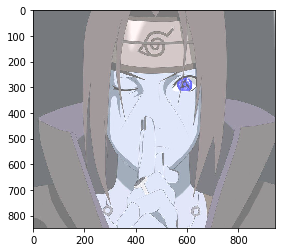

In [ ]:
M = np.ones(image.shape, dtype = "uint8") * 100
added = cv2.add(image, M)
plt.imshow(added)

### Similarly, we can subtract 50 from all pixels in our image and make it darker:

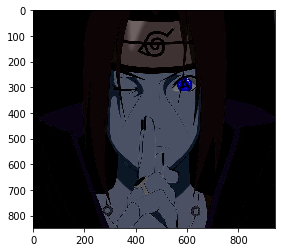

In [ ]:
M = np.ones(image.shape, dtype = "uint8") * 50
subtracted = cv2.subtract(image, M)
plt.imshow(subtracted)

# Bitwise Operations

### Import the necessary packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

### First, let's draw a rectangle

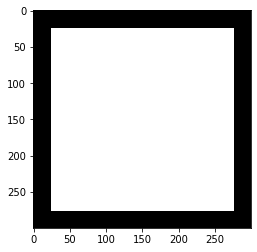

In [ ]:
rectangle = np.zeros((300, 300, 3), dtype = "uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), (255, 255, 255), -1)
plt.imshow(rectangle)

### Secondly, let's draw a circle

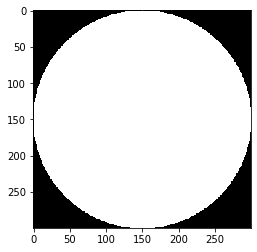

In [ ]:
circle = np.zeros((300, 300, 3), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, (255, 255, 255), -1)
plt.imshow(circle)

### A bitwise 'AND' is only True when both rectangle and circle have a value that is 'ON'. 

Simply put, the bitwise_and function examines every pixel in rectangle and circle. 

If both pixels have a value greater than zero, that pixel is turned 'ON' (i.e set to 255 in the output image). 

If both pixels are not greater than zero, then the output pixel is left 'OFF' with a value of 0.

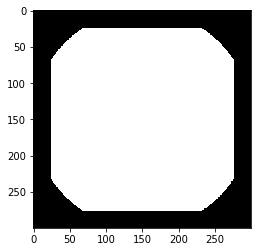

In [ ]:
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
plt.imshow(bitwiseAnd)

### A bitwise 'OR' examines every pixel in rectangle and circle. 

If EITHER pixel in rectangle or circle is greater than zero, then the output pixel has a value of 255, otherwise it is 0.

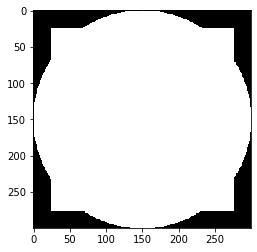

In [ ]:
bitwiseOr = cv2.bitwise_or(rectangle, circle)
plt.imshow(bitwiseOr)

### The bitwise 'XOR' is identical to the 'OR' function with one exception

Both rectangle and circle are not allowed to have values greater than 0.

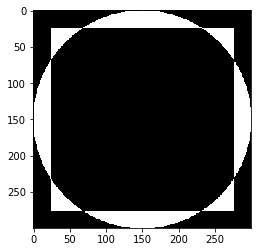

In [ ]:
bitwiseXor = cv2.bitwise_xor(rectangle, circle)
plt.imshow(bitwiseXor)

### Finally, the bitwise 'NOT' inverts the values of the pixels. 

Pixels with a value of 255 become 0, and pixels with a value of 0 become 255.

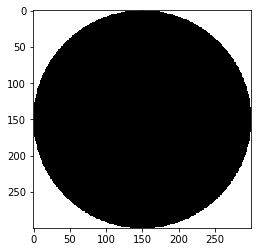

In [ ]:
bitwiseNot = cv2.bitwise_not(circle)
plt.imshow(bitwiseNot)

# Masking

### Import the necessary packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
%matplotlib inline

### Change color to RGB (from BGR)

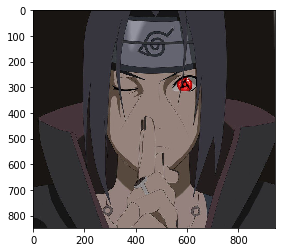

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### Masking allows us to focus only on parts of an image that interest us. 

A mask is the same size as our image, but has only two pixel values, 0 and 255. 

Pixels with a value of 0 are ignored in the orignal image, and mask pixels with a value of 255 are allowed to be kept. 

For example, let's construct a mask with a 300x300 square at the center of it and mask our image.

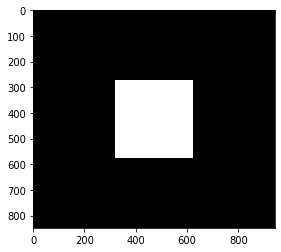

In [ ]:
mask = np.zeros(image.shape, dtype = "uint8")
(cX, cY) = (image.shape[1] // 2, image.shape[0] // 2)
cv2.rectangle(mask, (cX - 150, cY - 150), (cX + 150 , cY + 150), (255, 255, 255), -1)
plt.imshow(mask)

### Apply the Rectangluar Mask

Notice how only the center rectangular region of the pill is shown

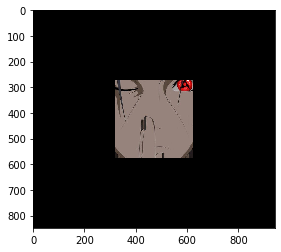

In [ ]:
image_copy = np.copy(image)
image_copy[mask == 0] = 0
plt.imshow(image_copy)

### Now, let's make a circular mask with a radius of 100 pixels

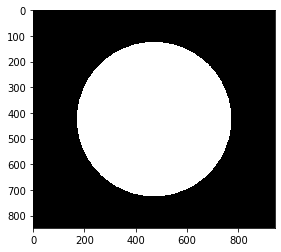

In [ ]:
mask = np.zeros(image.shape, dtype = "uint8")
cv2.circle(mask, (cX, cY), 300, (255, 255, 255), -1)
plt.imshow(mask)

### Apply the Circular Mask

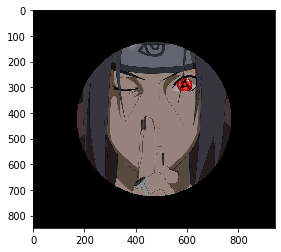

In [ ]:
image_copy = np.copy(image)
image_copy[mask == 0] = 0
plt.imshow(image_copy)

# Splitting and Merging Channels

### Importing the necessary packages

### Load the image and grab each channel: Red, Green, and Blue
NOTE: OpenCV stores an image as NumPy array with its channels in reverse order! 
    
When we call cv2.split, we are actually getting the channels as Blue, Green, Red!

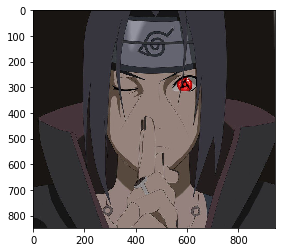

In [ ]:

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
(R, G, B) = cv2.split(image)

### Show each channel individually

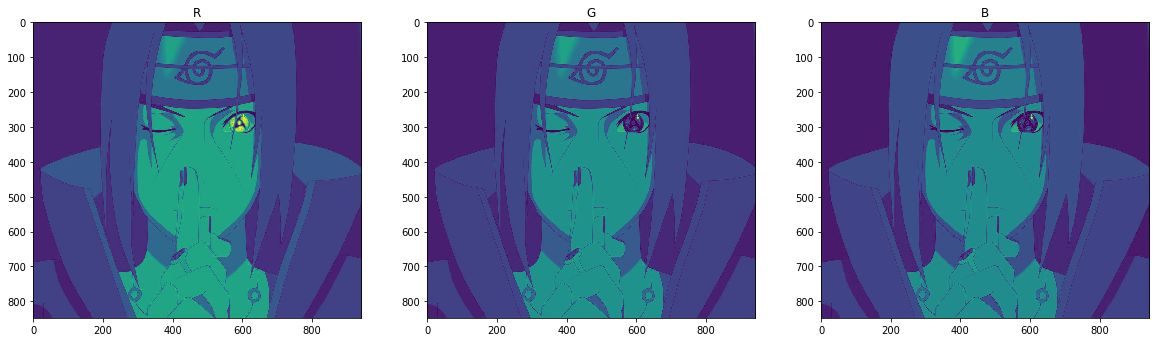

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('R')
ax1.imshow(image[:,:,0])

ax2.set_title('G')
ax2.imshow(G)

ax3.set_title('B')
ax3.imshow(B)

Note: No idea why Red, Green and Blue versions are not printed. :|

### Merge the image back together again

Text(0.5, 1.0, 'Merged')

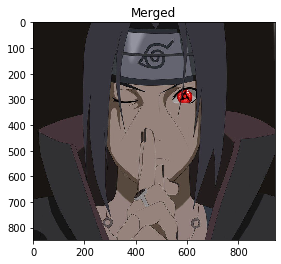

In [ ]:
merged = cv2.merge([R, G, B])
plt.imshow(merged)
plt.title('Merged')

### Now, let's visualize each channel in color

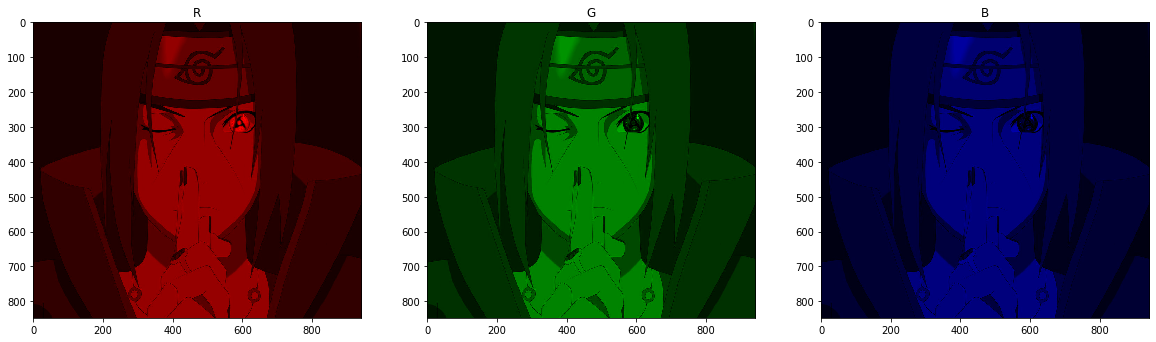

In [ ]:
zeros = np.zeros(image.shape[:2], dtype = "uint8")

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('R')
ax1.imshow(cv2.merge([R, zeros, zeros]))

ax2.set_title('G')
ax2.imshow(cv2.merge([zeros, G, zeros]))

ax3.set_title('B')
ax3.imshow(cv2.merge([zeros, zeros, B]))

# Color Spaces

### Import the necessary packages

### Load the image and show it

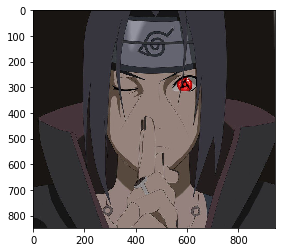

In [ ]:
image = cv2.imread("images/image1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Converting to RGB (from BGR)
plt.imshow(image)

### Convert the image to grayscale

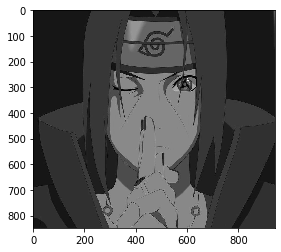

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

### Convert the image to the HSV (Hue, Saturation, Value) color spaces

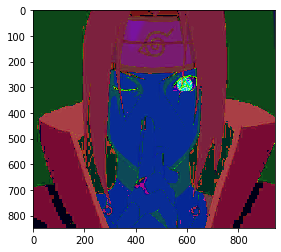

In [ ]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
plt.imshow(hsv)

### Convert the image to the L x a x b color spaces

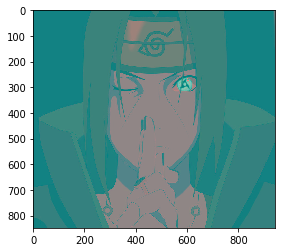

In [ ]:
lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
plt.imshow(lab)

# Grayscale Histogram

### Load the image, convert it to grayscale, and show it

Text(0.5, 1.0, 'Gray')

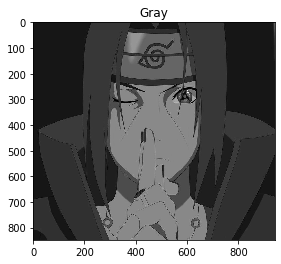

In [ ]:
image = cv2.imread("images/image1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title('Gray')

# Smoothing and Blurring

### Import the necessary packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

### Load the image and show it

Text(0.5, 1.0, 'Original')

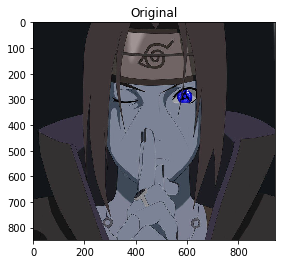

In [ ]:
image = cv2.imread("images/image1.jpg")

plt.imshow(image)
plt.title('Original')

### Let's apply standard "Averaging" blurring first. 

Average blurring (as the name suggests), takes the average of all pixels in the surrounding area and replaces the centeral element of the output image with the average. Thus, in order to have a central element, the area surrounding the central must be odd. 

Here are a few examples with varying kernel sizes. Notice how the larger the kernel gets, the more blurred the image becomes.

Text(0.5, 1.0, 'Averaged')

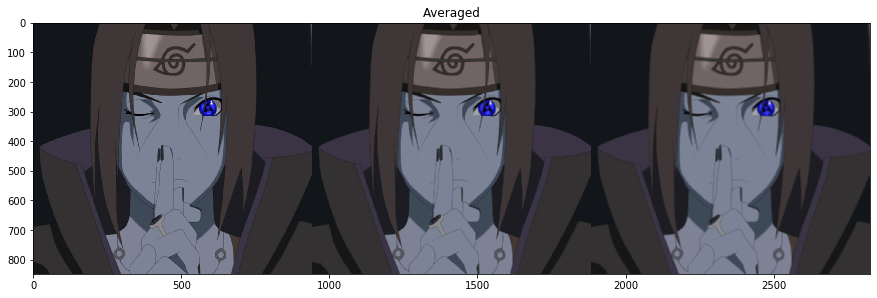

In [ ]:
blurred = np.hstack([
    cv2.blur(image, (3, 3)),
    cv2.blur(image, (5, 5)),
    cv2.blur(image, (7, 7))])

plt.figure(figsize=(15,5))
plt.imshow(blurred)
plt.title('Averaged')

### Let's apply "Gaussian" blurring.

We can also apply Gaussian blurring, where the relevant parameters are the image we want to blur and the standard deviation in the X and Y direction. 

Again, as the standard deviation size increases, the image becomes progressively more blurred.

Text(0.5, 1.0, 'Gaussian')

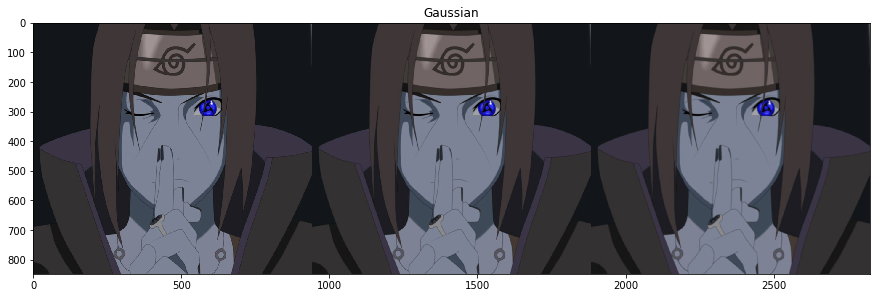

In [ ]:
blurred = np.hstack([
    cv2.GaussianBlur(image, (3, 3), 0),
    cv2.GaussianBlur(image, (5, 5), 0),
    cv2.GaussianBlur(image, (7, 7), 0)])

plt.figure(figsize=(15,5))
plt.imshow(blurred)
plt.title("Gaussian")

### Let's apply "Median" blurring.

The cv2.medianBlur function is mainly used for removing what is called "salt-and-pepper" noise. 

Unlike the Average method mentioned above, the median method (as the name suggests), calculates the median pixel value amongst the surrounding area.

Text(0.5, 1.0, 'Blurred')

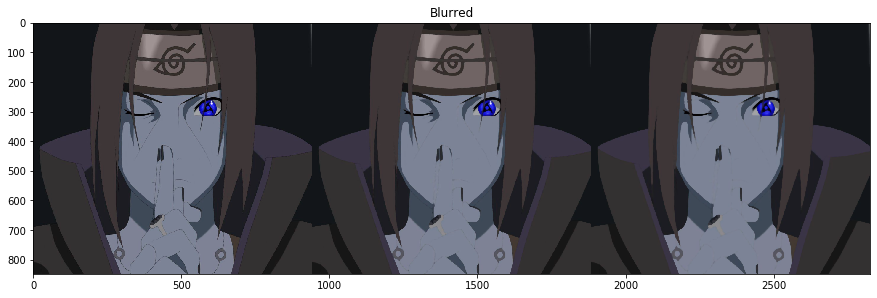

In [ ]:
blurred = np.hstack([
    cv2.medianBlur(image, 3),
    cv2.medianBlur(image, 5),
    cv2.medianBlur(image, 7)])

plt.figure(figsize=(15,5))
plt.imshow(blurred)
plt.title("Blurred")

### Let's apply the "Bilateral Filter". 

You may have noticed that blurring can help remove noise, but also makes edge less sharp. 

In order to keep edges sharp, we can use bilateral filtering. We need to specify the diameter of the neighborhood (as in examples above), along with sigma values for color and coordinate space. 

The larger these sigma values, the more pixels will be considered within the neighborhood.

Text(0.5, 1.0, 'Bilateral')

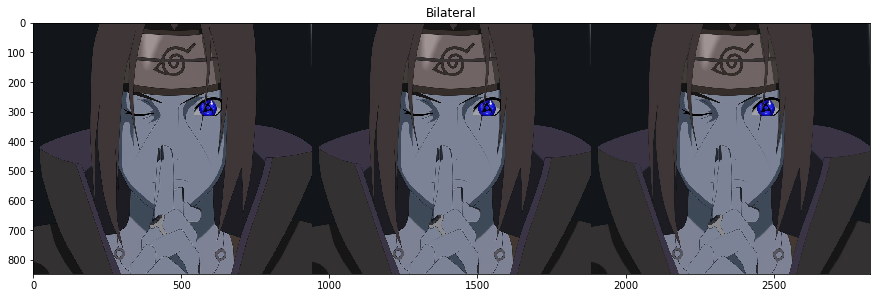

In [ ]:
blurred = np.hstack([
    cv2.bilateralFilter(image, 5, 21, 21),
    cv2.bilateralFilter(image, 7, 31, 31),
    cv2.bilateralFilter(image, 9, 41, 41)])

plt.figure(figsize=(15,5))
plt.imshow(blurred)
plt.title("Bilateral")

# Thresholding
### - Simple Thresholding, Adaptive Thresholding, Otsu and Riddler-Calvard

### Import the necessary packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mahotas
import cv2

%matplotlib inline

### Load the image, convert it to grayscale, and blur it slightly

Text(0.5, 1.0, 'Image')

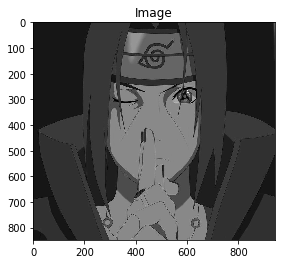

In [ ]:
image = cv2.imread("images/image1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)

plt.imshow(image, cmap='gray')
plt.title("Image")

# 1. Simple Thresholding

### Let's apply basic thresholding. 

The first parameter is the image we want to threshold, the second value is is our threshold cehck. 

If a pixel value is greater than our threshold (in this case, 250), we it to be WHITE, otherwise it is BLACK.

Text(0.5, 1.0, 'Threshold Binary Inverse')

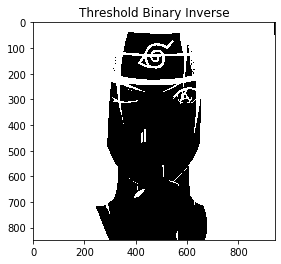

In [ ]:
(T, threshInv) = cv2.threshold(blurred, 60, 250, cv2.THRESH_BINARY_INV)

plt.imshow(threshInv, cmap='gray')
plt.title("Threshold Binary Inverse")

### Using a normal we can change the last argument in the function to make the skin black rather than white.

Text(0.5, 1.0, 'Threshold Binary')

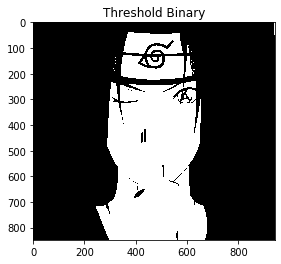

In [ ]:
(T, thresh) = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.title("Threshold Binary")

### Finally, let's use our threshold as a mask and hide Itachi's Face

Text(0.5, 1.0, 'No Face')

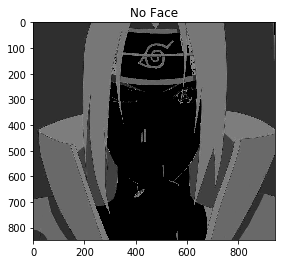

In [ ]:
coins = cv2.bitwise_and(image, image, mask = threshInv)

plt.imshow(coins, cmap='gray')
plt.title("No Face")

# 2. Adaptive Thresholding

In our previous example, we had to use manually specify a pixel value to globally threshold the image. 

In this example we are going to examine a neighborbood of pixels and adaptively apply thresholding to each neighborbood. We'll calculate the mean value of the neighborhood area of 11 pixels and threshold based on that value. 

Finally, our constant C is subtracted from the mean calculation (in this case 4)

Text(0.5, 1.0, 'Mean Thresholding and Gaussian Thresholding')

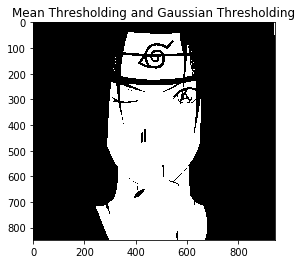

In [ ]:
threshArray = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
    
plt.imshow(thresh, cmap='gray',)
plt.title("Mean Thresholding and Gaussian Thresholding")

### We can also apply Gaussian thresholding in the same manner

Text(0.5, 1.0, 'Gaussian Thresh')

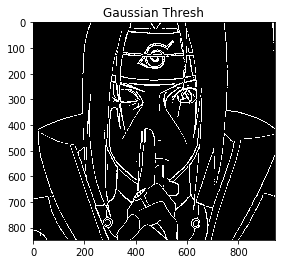

In [ ]:
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)

plt.imshow(thresh, cmap='gray')
plt.title("Gaussian Thresh")

#  Canny Edge Detector

Text(0.5, 1.0, 'Blurred')

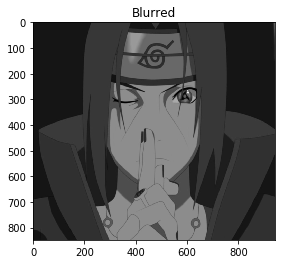

In [ ]:
blurred = cv2.GaussianBlur(image, (5, 5), 0)

plt.imshow(blurred, cmap='gray')
plt.title("Blurred")

When performing Canny edge detection we need two values for hysteresis: threshold1 and threshold2. 

Any gradient value larger than threshold2 are considered to be an edge. Any value below threshold1 are considered not to ben an edge. Values in between threshold1 and threshold2 are either classified as edges or non-edges based on how the intensities are "connected". 

In this case, any gradient values below 30 are considered non-edges whereas any value above 150 are considered edges.

Text(0.5, 1.0, 'Canny')

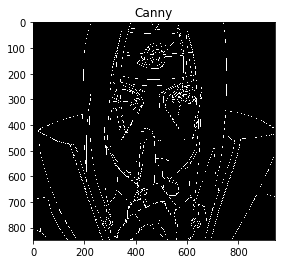

In [ ]:
canny = cv2.Canny(image, 30, 150)

plt.imshow(canny, cmap='gray')
plt.title('Canny')

# Contours

### Import the necessary packages

In [ ]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

### Load the image, convert it to grayscale, and blur it slightly

Text(0.5, 1.0, 'Original')

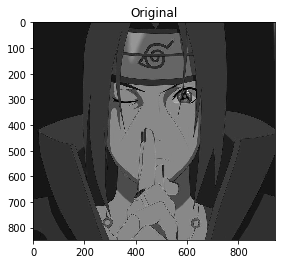

In [ ]:
image = cv2.imread("images/image1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (11, 11), 0)

plt.imshow(gray, cmap='gray')
plt.title("Original")

Text(0.5, 1.0, 'Edges')

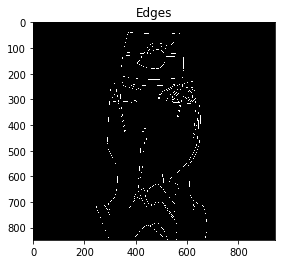

In [ ]:
edged = cv2.Canny(blurred, 30, 140)

plt.imshow(edged, cmap='gray')
plt.title("Edges")

In [ ]:
cnts, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

### Let's highlight the Face Edges  in the original image by drawing a green line

Text(0.5, 1.0, 'contour detection')

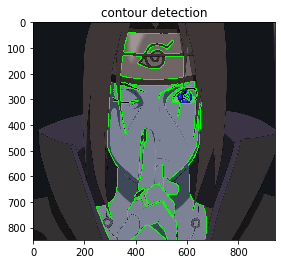

In [ ]:
coi= image.copy()
cv2.drawContours(coi, cnts, -1, (0, 255, 0), 2)

plt.imshow(coi, cmap='gray')
plt.title("contour detection")

## Camera Things 

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)  # 0  means the prime Camera    # 1 for second camera [ usb] #  you can put a video path in string  like 'video.mp4'
 
while(cap.isOpened()):
    ret, frame = cap.read()   # to Read each Frame   [ ret is True when frame is read perfectly, frame is the image]

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)     # Change BGR  to  Gray Colormap

    cv2.imshow('frame',gray)
    if cv2.waitKey(1000) & 0xFF == ord('q'):    #  PRESS "q" TO  Quit  # 1000  =  1 second 
        break

cap.release() # Close The Camera
cv2.destroyAllWindows()

![challengeribbonflat.png](attachment:challengeribbonflat.png)

# Challenge 2  :- Save 20 images for you with your classmate  with one click

She7a_Khaled_1.jpg
She7a_Khaled_2.jpg
She7a_Khaled_3.jpg
...
She7a_Khaled_20.jpg

In [ ]:
# Your Code 
None 